 ### <br><b> Introduction to data analysis_TP2</b>

-->This document can't be modified. You don't have the authority to save changes to this notebook. ***So be sure you download your work before exiting!***  (use the above **download** buttun)

Our objective here is to introduce you to xarray; an open source project and Python package that makes working with labelled multi_dimensional arrays simple, efficient, and fun!

We will do that with a data set of climate variables from GRENOBLE-ST GEOIRS AEROPORT , which are downloaded from METEO FRANCE site.
>In case your curiosity strikes you:
    <u><br>https://donneespubliques.meteofrance.fr/</u>

As getting the data through this interface is kind of clumsy, a version is available from the following file: /data/Data.xslx

This datafile contains following data:

> <u>Variables:</u>
    <br>- max/min/mean temperature
    <br>- total precipitation 
  <br><u>Temporal coverage: </u>
        <br>1968/01/01-2022/01/31

    

<br><b>Tasks:</b>

> 1) Calculate the seasonal annual averages of the variables over the available period (cold season: ONDJFM and warm season: AMJJAS )
  2) Plot the seasonal annual time series of the variables
  3) Calculate the seasonal trends and significance using student t-test 
  4) Calculate the correlation between max and min temperatures 
  5) Indicate the snowy days (Temperature<0, and precipiataion>0) and plot the time series 



### >> <b> Load Libraries</b>


In [8]:
# to render your plots in your notebook %matplotlib inline 
%matplotlib inline 
import matplotlib.pyplot as plt # for plots 
import numpy as np # mathematical functions
import xarray as xr 
import pandas as pd # 

### >> <b> Load data</b>
It is always good to take a look at the file before opening it with python. 
</br>This can be done by opening it with excel, or with a text editor, or as we will do here, from the command line:

</br>**head**: outputs the first few lines of a text file
</br>**tail**: outputs the last few lines of a text file
</br>**more**: outputs all the text file (very bad if too big a file...)
</br>**cut -c-80**: outputs the first 80 characters of every line of a text file

In [ ]:
# To execute command line statements directly from the notebook we use "! prefix". "%% bash" could be used also
! tail /home/fjomaa/TP_master/Data/Data.csv

**1. csv**
> Open a csv file using pandas. Pandasas is widely used for analysing any dataset that most chemists (or biologists) would naturally handle in excel. 

In [ ]:
## read csv file
df = pd.read_csv('/home/fjomaa/TP_master/Data/Data.csv')
df.head() #print the first 5 rows 

>For working with labeled multi-dimensional arrays it's always a good choice to work with xarray. So here we convert the csv format into xarray

In [ ]:
da=df.to_xarray().drop('Date').rename({'index':'time'})
time=pd.date_range('1/1/1968','31/1/2022',freq='D')
da['time']=time

In [ ]:
da

**2. netcdf**

> NetCDF (network Common Data Form) is a file format for storing multidimensional scientific data (variables) such as temperature, humidity, pressure, wind speed, and direction.

In [28]:
#Saving a netcdf file
#da.to_netcdf('/home/fjomaa/TP_master/Data.nc')

### >> <b> Get started with Xarray</b>

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. 
Then a variable consists of: 

* dims: A tuple of dimension names.
* data: The N-dimensional array (typically, a NumPy or Dask array) storing the Variable’s data. It must have the same number of dimensions as the length of dims.
* attrs: An ordered dictionary of metadata associated with this array.
* encoding: Another ordered dictionary used to store information about how these variable’s data is represented on disk. 


In [14]:
# Open the netcdf file using xarray 
# Don't forget to change the file path ;)
da=xr.open_dataset('/home/fjomaa/TP_master/Data/Data.nc')
da

<xarray.Dataset>
Dimensions:        (time: 19755)
Coordinates:
  * time           (time) datetime64[ns] 1968-01-01 1968-01-02 ... 2022-01-31
Data variables:
    Station        (time) int64 ...
    mean_T         (time) float64 ...
    min_T          (time) float64 ...
    max_T          (time) float64 ...
    Precipitation  (time) float64 ...

In [15]:
da.attrs
da.encoding
da.dims
da.coords

Coordinates:
  * time     (time) datetime64[ns] 1968-01-01 1968-01-02 ... 2022-01-31

**Select Variables:**

In [16]:
# To call a variable 
precip=da.Precipitation
meanT=da.mean_T
minT=da.min_T
maxT=da.max_T

In [17]:
da.sel(time=slice('1979-01-01','2022-01-01'))

<xarray.Dataset>
Dimensions:        (time: 15707)
Coordinates:
  * time           (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-01-01
Data variables:
    Station        (time) int64 38384001 38384001 38384001 ... 38384001 38384001
    mean_T         (time) float64 -2.4 -8.2 -5.3 -2.2 -1.4 ... 9.1 11.7 7.6 6.0
    min_T          (time) float64 -9.9 -11.5 -11.0 -7.3 -2.3 ... 7.0 9.4 3.0 0.9
    max_T          (time) float64 1.5 -3.8 -1.8 -0.8 0.6 ... 12.3 14.8 15.9 15.2
    Precipitation  (time) float64 0.4 1.6 0.0 4.4 0.0 ... 19.7 10.0 0.0 0.0 0.0

**Select period:**

In [18]:
da.where((da['time.year']>2017),drop=True)

<xarray.Dataset>
Dimensions:        (time: 1492)
Coordinates:
  * time           (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2022-01-31
Data variables:
    Station        (time) float64 3.838e+07 3.838e+07 ... 3.838e+07 3.838e+07
    mean_T         (time) float64 6.3 5.0 7.6 8.5 10.9 ... -2.0 -0.1 0.5 4.5 3.1
    min_T          (time) float64 3.7 2.3 5.0 4.8 7.4 ... -3.5 -0.9 -0.3 -0.9
    max_T          (time) float64 9.1 7.2 13.3 13.9 16.1 ... 2.3 1.9 3.8 7.2 6.0
    Precipitation  (time) float64 2.6 0.0 16.1 3.4 0.2 ... 0.0 0.0 0.0 0.0 1.4

**Compute Climatology:**

In [7]:
precip.groupby('time.year').mean()
precip.groupby('time.month').std()

<xarray.DataArray 'Precipitation' (month: 12)>
array([ 4.75308264,  4.83274481,  5.44372966,  5.91769573,  6.94878268,
        6.66325939,  6.24195473,  6.31330329, 10.28290887,  8.53274373,
        7.53229866,  5.4120095 ])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

**Plots**

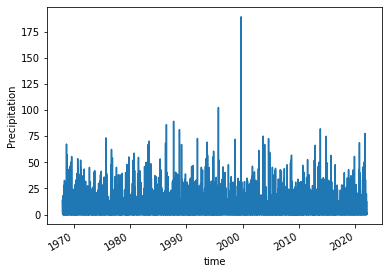

In [7]:
precip.plot()

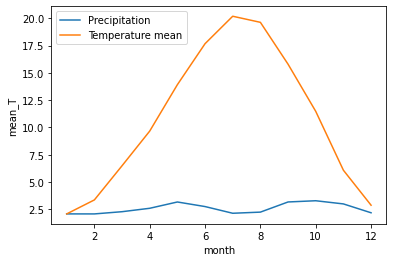

In [8]:
precip.groupby('time.month').mean().plot(label='Precipitation')
meanT.groupby('time.month').mean().plot(label='Temperature mean')
plt.legend()

**Seasonal analysis**

In [9]:
da.groupby('time.season')

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [10]:
s=precip.groupby('time.season')
s

DataArrayGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

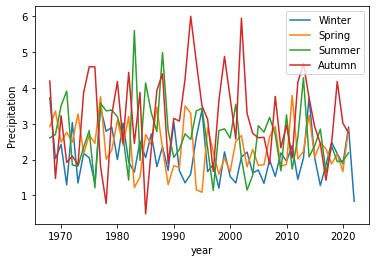

In [11]:
s['DJF'].groupby('time.year').mean().plot(label='Winter')
s['JJA'].groupby('time.year').mean().plot(label='Spring')
s['MAM'].groupby('time.year').mean().plot(label='Summer')
s['SON'].groupby('time.year').mean().plot(label='Autumn')
plt.legend()

In [12]:
cold=da.where((da['time.month']>9)  | (da['time.month']<4),drop=True)
warm=da.where((da['time.month']>=4) & (da['time.month']<=9),drop=True)

In [13]:
cold_annual=cold.groupby('time.year').mean()
warm_annual=warm.groupby('time.year').mean()

In [14]:
cold

<xarray.Dataset>
Dimensions:        (time: 9873)
Coordinates:
  * time           (time) datetime64[ns] 1968-01-01 1968-01-02 ... 2022-01-31
Data variables:
    Station        (time) float64 3.838e+07 3.838e+07 ... 3.838e+07 3.838e+07
    mean_T         (time) float64 -0.7 0.2 -2.3 1.6 1.4 ... -0.1 0.5 4.5 3.1
    min_T          (time) float64 -5.0 -0.8 -5.2 -0.9 ... -3.5 -0.9 -0.3 -0.9
    max_T          (time) float64 2.3 2.0 2.8 3.2 7.8 ... 2.3 1.9 3.8 7.2 6.0
    Precipitation  (time) float64 12.8 6.9 5.2 4.5 14.4 ... 0.0 0.0 0.0 0.0 1.4

Text(0.5, 0.98, 'Annual means')

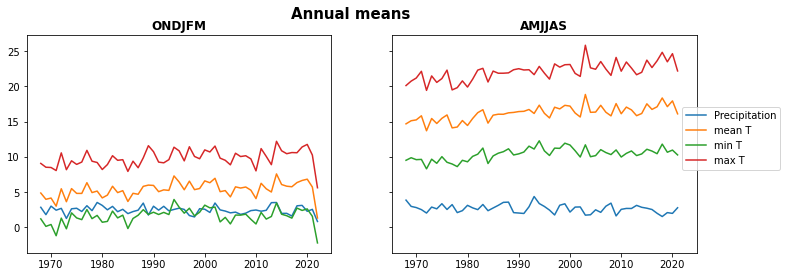

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12,4),sharex=True,sharey=True)
precip=cold_annual.Precipitation
meanT=cold_annual.mean_T
minT=cold_annual.min_T
maxT=cold_annual.max_T
var_list=[precip,meanT,minT,maxT]
labels=['Precipitation','mean T','min T','max T']
season=[cold_annual,warm_annual]


ax=axs[0]
for i_var,var in enumerate(var_list):
    ax.plot(season[0].year,var)
    ax.set_title('ONDJFM',fontweight='bold')

ax=axs[1]
precip=warm_annual.Precipitation
meanT=warm_annual.mean_T
minT=warm_annual.min_T
maxT=warm_annual.max_T
var_list=[precip,meanT,minT,maxT]


for i_var,var in enumerate(var_list):
    ax.plot(season[1].year,var,label=labels[i_var])
    ax.set_title('AMJJAS',fontweight='bold')
    
fig.legend(loc='right')
fig.suptitle('Annual means',fontweight='bold',fontsize=15)

In [133]:
snowy_days_cold=cold.where((cold.Precipitation>0)& (cold.min_T<0))
snowy_days_warm=warm.where((warm.Precipitation>0)& (warm.min_T<0))

In [126]:
snowy_days

<xarray.Dataset>
Dimensions:        (time: 9873)
Coordinates:
  * time           (time) datetime64[ns] 1968-01-01 1968-01-02 ... 2022-01-31
Data variables:
    Station        (time) float64 3.838e+07 3.838e+07 ... nan 3.838e+07
    mean_T         (time) float64 -0.7 0.2 -2.3 1.6 nan ... nan nan nan nan 3.1
    min_T          (time) float64 -5.0 -0.8 -5.2 -0.9 nan ... nan nan nan -0.9
    max_T          (time) float64 2.3 2.0 2.8 3.2 nan ... nan nan nan nan 6.0
    Precipitation  (time) float64 12.8 6.9 5.2 4.5 nan ... nan nan nan nan 1.4

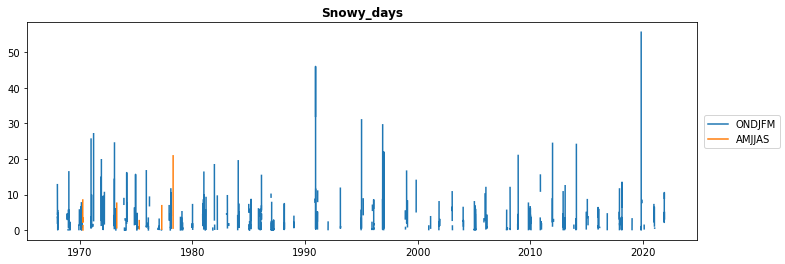

In [158]:
fig, axs = plt.subplots(1, 1, figsize=(12,4),sharex=True,sharey=True)
precip1=snowy_days_cold.Precipitation
precip2=snowy_days_warm.Precipitation

var_list=[precip1,precip2]
labels=['ONDJFM','AMJJAS']
season=[snowy_days_cold,snowy_days_warm]



for i_var,var in enumerate(var_list):
    axs.plot(season[i_var].time,var,label=labels[i_var])
    axs.set_title('Snowy_days',fontweight='bold')

# ax=axs[1]


# var_list=[precip]
# for i_var,var in enumerate(var_list):
#     ax.plot(season[1].time,var,label=labels[i_var])
#     ax.set_title('AMJJAS',fontweight='bold')
    
fig.legend(loc='right')

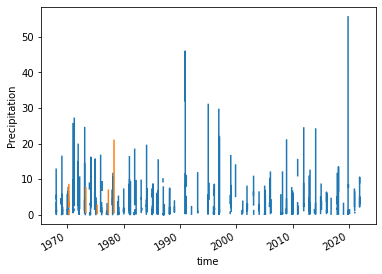

In [135]:
snowy_days_cold.Precipitation.plot()
snowy_days_warm.Precipitation.plot()

## Now that we've got the hang of xarray, let's start analysing our data

<br><b>Tasks:</b>

> 1) Calculate the seasonal annual averages of the variables over the available period (cold season: ONDJFM and warm season: AMJJAS ) use **.where**
  2) Plot the seasonal annual time series of the variables use **matplotlib**
  3) Calculate the seasonal trends and significance using student t-test use **scipy.stats.linregress** for trend and **scipy.stats.ttest_rel**
  4) Calculate the correlation between max and min temperatures **np.corrcoef**
  5) Indicate the snowy days (Temperature<0, and precipiataion>0) and plot the time series 

In [9]:
from scipy import stats

In [10]:
time=np.arange(0,55)

In [11]:
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

In [19]:
n=precip.groupby('time.year').mean()
n

<xarray.DataArray 'Precipitation' (year: 55)>
array([3.3579235 , 2.39232877, 2.91205479, 2.47972603, 2.36639344,
       2.07753425, 2.63315068, 3.03534247, 2.39590164, 3.15041096,
       2.23534247, 2.95123288, 3.12021858, 2.62958904, 2.74684932,
       2.73753425, 2.46393443, 2.35205479, 2.68493151, 2.9969863 ,
       3.5136612 , 1.92356164, 2.51808219, 2.20767123, 2.95464481,
       3.36520548, 2.96273973, 2.84657534, 2.50054645, 1.72054795,
       2.31424658, 2.99780822, 2.37431694, 2.49972603, 3.17643836,
       2.10794521, 2.05136612, 2.27753425, 2.14849315, 2.42410959,
       2.72786885, 2.00054795, 2.51068493, 2.49068493, 2.55218579,
       3.31287671, 3.18684932, 2.35452055, 2.26393443, 1.80438356,
       2.29753425, 2.60684932, 2.13114754, 2.67123288, 0.83870968])
Coordinates:
  * year     (year) int64 1968 1969 1970 1971 1972 ... 2018 2019 2020 2021 2022

In [20]:
n.year

<xarray.DataArray 'year' (year: 55)>
array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])
Coordinates:
  * year     (year) int64 1968 1969 1970 1971 1972 ... 2018 2019 2020 2021 2022

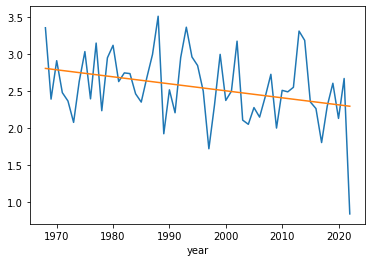

In [30]:
n.plot()
trend.plot()

In [31]:
stats.ttest_1samp(precip.groupby('time.year').mean(),0)

Ttest_1sampResult(statistic=39.48063063786421, pvalue=1.62703795411256e-41)

In [13]:
from scipy import stats

In [61]:
s,i,r,p,st=stats.linregress(time,n.values)

In [15]:
stats.linregress(time,n.values)

LinregressResult(slope=-0.009477167385264865, intercept=2.8077866321564344, rvalue=-0.3167392187636201, pvalue=0.018469793336878367, stderr=0.003898359686851947, intercept_stderr=0.12210021003814463)

In [53]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	from scipy.stats import t 
	from scipy.stats import sem
	# calculate means
	mean1, mean2 = np.mean(data1), np.mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# n1, n2 = len(data1), len(data2)
	# std1,std2=np.std(data1),np.std(data2)
	# se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)
	# standard error on the difference between the samples
	sed = np.sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	p = t.cdf(abs(2.34), df)   
	# return everything
	print(t_stat, df, cv, p)
	return t_stat, df, cv, p

In [54]:
independent_ttest(time,n,0.02)

<xarray.DataArray 'Precipitation' ()>
array(11.31220715) 53 2.1055339716272687 0.9884589364670896


(<xarray.DataArray 'Precipitation' ()>
 array(11.31220715),
 53,
 2.1055339716272687,
 0.9884589364670896)

In [55]:
import sys
sys.path.insert(1,'/home/fjomaa/') # to include my functions file in another directory
from aa import *
from aa.statistics import trend
import aa
from aa.statistics import slope


In [47]:
x=aa.open('/home/fjomaa/TP_master/Data/Data.nc')

In [48]:
x.Precipitation.trend[0].data

2.348575192019909 2.009100843841146 0.9885576406258365


array(-0.09477374)

In [22]:
import statistics

In [23]:
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

In [24]:
#covariance(x, y)/variance(x)
np.cov(time,n)[0][1]/statistics.variance(time)

-0.009501847508663992

In [25]:
independent_ttest(time,n,0.05)

1.6590851435825054 0.9999999999999996


(<xarray.DataArray 'Precipitation' ()>
 array(11.31220715),
 108,
 1.6590851435825054,
 0.9999999999999996)

In [ ]:
stats.ttest_ind(n.values,trend)

Ttest_indResult(statistic=1.964948332430365e-14, pvalue=0.9999999999999843)

In [62]:
trend=n.year.values*s+21.458852046357688

In [63]:
trend

array([2.80778663, 2.79830946, 2.7888323 , 2.77935513, 2.76987796,
       2.7604008 , 2.75092363, 2.74144646, 2.73196929, 2.72249213,
       2.71301496, 2.70353779, 2.69406062, 2.68458346, 2.67510629,
       2.66562912, 2.65615195, 2.64667479, 2.63719762, 2.62772045,
       2.61824328, 2.60876612, 2.59928895, 2.58981178, 2.58033461,
       2.57085745, 2.56138028, 2.55190311, 2.54242595, 2.53294878,
       2.52347161, 2.51399444, 2.50451728, 2.49504011, 2.48556294,
       2.47608577, 2.46660861, 2.45713144, 2.44765427, 2.4381771 ,
       2.42869994, 2.41922277, 2.4097456 , 2.40026843, 2.39079127,
       2.3813141 , 2.37183693, 2.36235977, 2.3528826 , 2.34340543,
       2.33392826, 2.3244511 , 2.31497393, 2.30549676, 2.29601959])

In [ ]:
   from scipy.stats import t as student
    # two sided student test p = 0.95 becomes a one sided p = 0.975
    # what test statistics should we surpass ?
    # minus two degrees of freedom, again
    t_level = student.ppf(0.975, effectiveSampleSize - 2)
    # also possible : use cdf to determine p-value of t_stat
    p_value = student.cdf(t_stat.data, effectiveSampleSize - 2)
    #print slope.data, sigmaSlope, p_value
    # per decade rates
    # print(t_stat, t_level, p_value)
    print(t_stat,t_level)

In [37]:
stats.ttest_ind(time,n.values)

Ttest_indResult(statistic=11.312207149828762, pvalue=4.839929572170288e-20)

In [59]:
stats.linregress(n.year, n.values)


LinregressResult(slope=-0.009477167385264865, intercept=21.458852046357688, rvalue=-0.3167392187636201, pvalue=0.018469793336878367, stderr=0.003898359686851947, intercept_stderr=7.777473783563202)

Ttest_indResult(statistic=11.312207149828762, pvalue=4.839929572170288e-20)

In [51]:
stats.ttest_rel(time,n.values)

Ttest_relResult(statistic=11.206593058614814, pvalue=1.0406002233149767e-15)

In [52]:
np.corrcoef(time,n.values)

array([[ 1.        , -0.31673922],
       [-0.31673922,  1.        ]])

In [49]:
import pingouin as pt

# Python paired sample t-test:
pt.ttest(a, b, paired=True)

ModuleNotFoundError: No module named 'pingouin'

In [22]:
Y=n
X=n.year

In [183]:
X.mean('year')

<xarray.DataArray 'year' ()>
array(1995.)

In [25]:
slope = ((Y - Y.mean('year'))*((X - (X).mean('year'))/X.var())).mean('year')

In [26]:
slope

<xarray.DataArray ()>
array(-0.00947717)

In [36]:
residuals = Y.data - slope.data*(X - (X).mean('year')) - np.nanmean(Y.data, 0)


In [37]:
residuals

<xarray.DataArray 'year' (year: 55)>
array([ 0.55013687, -0.4059807 ,  0.1232225 , -0.2996291 , -0.40348452,
       -0.68286655, -0.11777294,  0.29389601, -0.33606765,  0.42791883,
       -0.47767249,  0.24769509,  0.42615796, -0.05499442,  0.07174303,
        0.07190513, -0.19221753, -0.29461999,  0.04773389,  0.36926585,
        0.89541792, -0.68520447, -0.08120676, -0.38214055,  0.37431019,
        0.79434803,  0.40135945,  0.29467223, -0.0418795 , -0.81240083,
       -0.20922504,  0.48381378, -0.13020034,  0.00468592,  0.69087542,
       -0.36814057, -0.41524249, -0.17959719, -0.29916112, -0.01406752,
        0.29916892, -0.41867482,  0.10093933,  0.0904165 ,  0.16139453,
        0.93156261,  0.81501238, -0.00783922, -0.08894817, -0.53902187,
       -0.03639402,  0.28239822, -0.18382639,  0.36573612, -1.45730992])
Coordinates:
  * year     (year) int64 1968 1969 1970 1971 1972 ... 2018 2019 2020 2021 2022

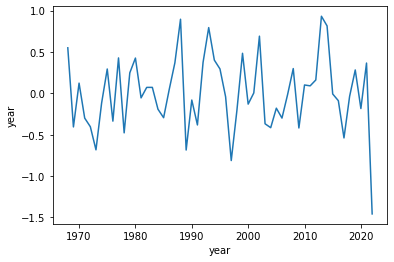

In [38]:
residuals.plot()


In [39]:
varianceResiduals = np.nansum(
            (residuals - 0)**2, 0)

In [40]:
sigmaSlope = (varianceResiduals/((X - X.mean('year'))**2).sum())**0.5
   

In [41]:
sigmaSlope

<xarray.DataArray 'year' ()>
array(0.02838049)

In [44]:
# test statistic under the null hypothesis slope == 0
# see Wilks page 141
t_stat = (-slope - 0)/sigmaSlope
from scipy.stats import t as student
# two sided student test p = 0.95 becomes a one sided p = 0.975
# what test statistics should we surpass ?
# minus two degrees of freedom, again
t_level = student.ppf(0.975,55+55-2)
# also possible : use cdf to determine p-value of t_stat
p_value = student.cdf(t_stat.data,55+55-2)

In [45]:
p_value

0.6304609934253251

In [46]:
t_stat

<xarray.DataArray ()>
array(0.33393252)

In [43]:
t_level

1.9821734832574511

In [31]:
def auto_correlate (Y) :
    # works on numpy arrays
    beginning = Y[:-1]
    end = Y[1:]
    return np.nanmean(
                (beginning - np.nanmean(beginning, 0))*\
                        (end - np.nanmean(end, 0))/\
                        (np.nanstd(beginning, 0)*np.nanstd(end, 0)),
                0)

In [27]:
trend=Y.year*slope+21.458852046357688

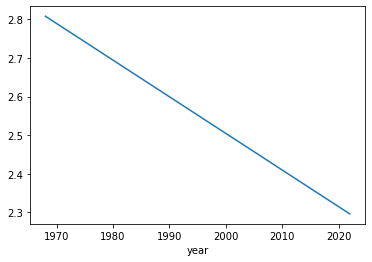

In [29]:
trend.plot()

In [ ]:
autocorr = np.maximum(auto_correlate(self.data), auto_correlate(other[adjust]))
    #corrceof = self[0].empty()
corrcoef = ((self - self.mean('t'))*(other - np.nanmean(other, 0))[adjust]).mean('t')/(
            ((self - self.mean('t'))**2).mean('t')**0.5*
            np.nanmean((other - np.nanmean(other, 0))**2, 0)**0.5)
# taking autocorrelation into account
effectiveSampleSize = self.shape[0]*(1 - autocorr)/(1 + autocorr)
# two parameters have been estimated : -2
# test statistic under the null hypothesis slope == 0
# see https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
t_stat = corrcoef*((effectiveSampleSize - 2)/(1 - corrcoef.data**2))**0.5
from scipy.stats import t as student
# two sided student test p = 0.95 becomes a one sided p = 0.975
# what test statistics should we surpass ?
# minus two degrees of freedom, again
t_level = student.ppf(0.975, effectiveSampleSize - 2)
# also possible : use cdf to determine p-value of t_stat
p_value = student.cdf(t_stat.data, effectiveSampleSize - 2)
#p_value = student.cdf(t_stat.data, effectiveSampleSize - 2)

In [75]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	from scipy.stats import t 
	# calculate means
	mean1, mean2 = np.mean(data1), np.mean(data2)
	# calculate standard errors
	se1, se2 = np.std(data1), np.std(data2)
	# standard error on the difference between the samples
	sed = np.sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat>cv, df, cv, p

In [72]:
independent_ttest(time,n,0.05)

(<xarray.DataArray 'Precipitation' ()>
 array(False),
 53,
 1.6741162362294313,
 0.12965716843333341)

In [51]:
time
n.values

array([3.3579235 , 2.39232877, 2.91205479, 2.47972603, 2.36639344,
       2.07753425, 2.63315068, 3.03534247, 2.39590164, 3.15041096,
       2.23534247, 2.95123288, 3.12021858, 2.62958904, 2.74684932,
       2.73753425, 2.46393443, 2.35205479, 2.68493151, 2.9969863 ,
       3.5136612 , 1.92356164, 2.51808219, 2.20767123, 2.95464481,
       3.36520548, 2.96273973, 2.84657534, 2.50054645, 1.72054795,
       2.31424658, 2.99780822, 2.37431694, 2.49972603, 3.17643836,
       2.10794521, 2.05136612, 2.27753425, 2.14849315, 2.42410959,
       2.72786885, 2.00054795, 2.51068493, 2.49068493, 2.55218579,
       3.31287671, 3.18684932, 2.35452055, 2.26393443, 1.80438356,
       2.29753425, 2.60684932, 2.13114754, 2.67123288, 0.83870968])

In [62]:
independent_ttest(time,n.values,0.05)

AttributeError: module 'numpy' has no attribute 'sem'

In [1]:
# Student's t-test for independent samples
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_ind(n.values,n.year)
print('t=%.3f, p=%.3f' % (stat, p))

NameError: name 'n' is not defined

In [4]:
np.array([     0.   8784.  17544.  26304.  35064.  43848.  52608.  61368.  70128.
  78912.  87672.  96432. 105192. 113976. 122736. 131496. 140256. 149040.
 157800. 166560. 175320. 184104. 192864. 201624. 210384. 219168. 227928.
 236688. 245448. 254232. 262992. 271752. 280512. 289296. 298056. 306816.
 315576. 324360. 333120. 341880. 350640. 359424. 368184. 376944. 385704.
 394488. 403248. 412008. 420768. 429552. 438312. 447072. 455832. 464616.
 473376.])

SyntaxError: invalid syntax (2841053300.py, line 1)

In [7]:
8784/24/365

1.0027397260273974

In [8]:
17544/24/365

2.0027397260273974

In [36]:
473376./24/365

54.038356164383565

In [4]:
t_stat, t_level, p_value

NameError: name 't_stat' is not defined

In [ ]:
from scipy.stats import t as student
    # two sided student test p = 0.95 becomes a one sided p = 0.975
    # what test statistics should we surpass ?
    # minus two degrees of freedom, again
t_level = student.ppf(0.975, 53)
    # also possible : use cdf to determine p-value of t_stat
#p_value = student.cdf(t_stat.data, effectiveSampleSize - 2)

In [6]:
t_level

2.0057459935369497

In [29]:
1-0.975

0.025000000000000022

In [9]:
from scipy.stats import t
numargs = t.numargs
[ df ] = [0.9,] * numargs
rv = t(df)

In [10]:
df

0.9

In [25]:
precip.groupby('time.year').mean()


<xarray.DataArray 'Precipitation' (year: 55)>
array([3.3579235 , 2.39232877, 2.91205479, 2.47972603, 2.36639344,
       2.07753425, 2.63315068, 3.03534247, 2.39590164, 3.15041096,
       2.23534247, 2.95123288, 3.12021858, 2.62958904, 2.74684932,
       2.73753425, 2.46393443, 2.35205479, 2.68493151, 2.9969863 ,
       3.5136612 , 1.92356164, 2.51808219, 2.20767123, 2.95464481,
       3.36520548, 2.96273973, 2.84657534, 2.50054645, 1.72054795,
       2.31424658, 2.99780822, 2.37431694, 2.49972603, 3.17643836,
       2.10794521, 2.05136612, 2.27753425, 2.14849315, 2.42410959,
       2.72786885, 2.00054795, 2.51068493, 2.49068493, 2.55218579,
       3.31287671, 3.18684932, 2.35452055, 2.26393443, 1.80438356,
       2.29753425, 2.60684932, 2.13114754, 2.67123288, 0.83870968])
Coordinates:
  * year     (year) int64 1968 1969 1970 1971 1972 ... 2018 2019 2020 2021 2022